# 🧠 TFI Redes Neuronales
**Maestría en Ciencias de Datos**

Facultad de Ingenieria - UCASAL
* Profesor: Dr. Diego Lizondo
* Alumno: Leopoldo Eugenio Lugones
## 🚦 Traffic Sign Classification using CNN
*Multi-class, single-image classification challenge*
### Objetivo
Clasificación Multi-Clase de Imágenes. El modelo debe tomar una única imagen de una señal de tráfico y determinar a cuál de las clases posibles pertenece.
### Dataset: German Traffic Sign Recognition Benchmark (GTSRB)
Conjunto de datos grande y realista, con imágenes capturadas en condiciones de vida real, lo que añade ruido, variaciones de luz, oclusión parcial y diferentes ángulos.

**Archivos:** [gtsrb-german-traffic-sign.zip](https://drive.google.com/file/d/1kCssKYlqeIl-HQce5m1PxUnYHqbMQxwP/view?usp=sharing)
### Clases
El desafío implica clasificar 43 clases diferentes de señales de tráfico (límites de velocidad, advertencias, prohibiciones, etc.). Esto lo convierte en un problema de alta dimensionalidad en el espacio de etiquetas.
### Contexto
El desafío de clasificación de señales de tráfico alemanas (German Traffic Sign Benchmark) es un reto de clasificación multiclase a partir de una sola imagen, celebrado en la Conferencia Internacional Conjunta sobre Redes Neuronales (IJCNN) 2011. Invitamos cordialmente a investigadores de campos relevantes a participar: la competición está diseñada para permitir la participación sin conocimientos especializados del dominio. Nuestro desafío presenta las siguientes características:
* Problema de clasificación multiclase a partir de una sola imagen
* Más de 40 clases
* Más de 50 000 imágenes en total
* Amplia base de datos realista
### Solución
La Convolutional Neural Network (CNN) es la arquitectura elegida debido a su probada eficacia en tareas de reconocimiento de imágenes:
* **Extracción de Características (Capas Convolucionales):** La CNN automáticamente aprende a identificar características clave de las imágenes, como los bordes, las formas y los patrones de color (como el círculo rojo o el triángulo de advertencia), que definen a cada señal.
* **Robustez:** Gracias al entrenamiento con aumento de datos (data augmentation) y las capas de Dropout, el modelo está diseñado para ser robusto y capaz de clasificar la señal correctamente incluso si la imagen está ligeramente rotada, distorsionada o tiene iluminación variable.
* **Resultado Final:** El modelo genera una Predicción (Prediction), indicando la probabilidad de que la imagen de entrada pertenezca a cada una de las 43 clases de señales.
### Agradecimientos
[INI Benchmark Website](http://benchmark.ini.rub.de/)

### 📚 Importar Bibliotecas Importantes

In [1]:
# Importing necessary libraries
# Libraries for data manipulation, visualization, and machine learning
# Additional libraries for image processing and progress tracking
# Suppressing warnings for cleaner output

import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")           

### ℹ️ Información sobre Clases e Imágenes

In [2]:
# Define the data directory
# data_dir = "/kaggle/input/gtsrb-german-traffic-sign"
data_dir = "C:/Projects/cnn/gtsrb-german-traffic-sign"

# Load the training CSV file
train_csv = pd.read_csv(os.path.join(data_dir, "Train.csv"))

# Number of unique classes (should be 43)
nb_classes = train_csv["ClassId"].nunique()
print("Number of classes:", nb_classes)

# Display the first few rows of the training CSV
classes = {
    0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)',
    3:'Speed limit (60km/h)', 4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)',
    6:'End of speed limit (80km/h)', 7:'Speed limit (100km/h)', 8:'Speed limit (120km/h)',
    9:'No passing', 10:'No passing veh over 3.5 tons', 11:'Right-of-way at intersection',
    12:'Priority road', 13:'Yield', 14:'Stop', 15:'No vehicles', 16:'Veh > 3.5 tons prohibited',
    17:'No entry', 18:'General caution', 19:'Dangerous curve left', 20:'Dangerous curve right',
    21:'Double curve', 22:'Bumpy road', 23:'Slippery road', 24:'Road narrows on the right',
    25:'Road work', 26:'Traffic signals', 27:'Pedestrians', 28:'Children crossing',
    29:'Bicycles crossing', 30:'Beware of ice/snow', 31:'Wild animals crossing',
    32:'End speed + passing limits', 33:'Turn right ahead', 34:'Turn left ahead',
    35:'Ahead only', 36:'Go straight or right', 37:'Go straight or left', 38:'Keep right',
    39:'Keep left', 40:'Roundabout mandatory', 41:'End of no passing', 42:'End no passing veh > 3.5 tons'
}

# Create a mapping: classid -> class name
class_names_label = classes

# Example lookup
print("Class 2 means:", class_names_label[2])

Number of classes: 43
Class 2 means: Speed limit (50km/h)


### ⏳ Carga de Datos

In [3]:
# Function to load and preprocess images
IMAGE_SIZE = (64, 64)
def load_data(df, base_dir):
    images = []
    labels = []

    for i, row in tqdm(df.iterrows(), total=len(df)):
        img_path = os.path.join(base_dir, row["Path"])
        label = row["ClassId"]

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)

        # Normalization
        image = image.astype("float32") / 255.0

        images.append(image)
        labels.append(label)

    images = np.array(images, dtype="float32")
    labels = np.array(labels, dtype="int32")
    return images, labels

# Load
# Training and testing data
test_csv  = pd.read_csv(os.path.join(data_dir, "Test.csv"))

train_images, train_labels = load_data(train_csv, data_dir)
test_images, test_labels = load_data(test_csv, data_dir)

100%|██████████| 12630/12630 [02:37<00:00, 80.09it/s] 


In [4]:
# Shuffle the training data
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [5]:
# Print dataset information
# Get number of training and testing examples
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples:", n_train)
print("Number of testing examples:", n_test)
print("Each image is of size:", IMAGE_SIZE)

Number of training examples: 39209
Number of testing examples: 12630
Each image is of size: (64, 64)


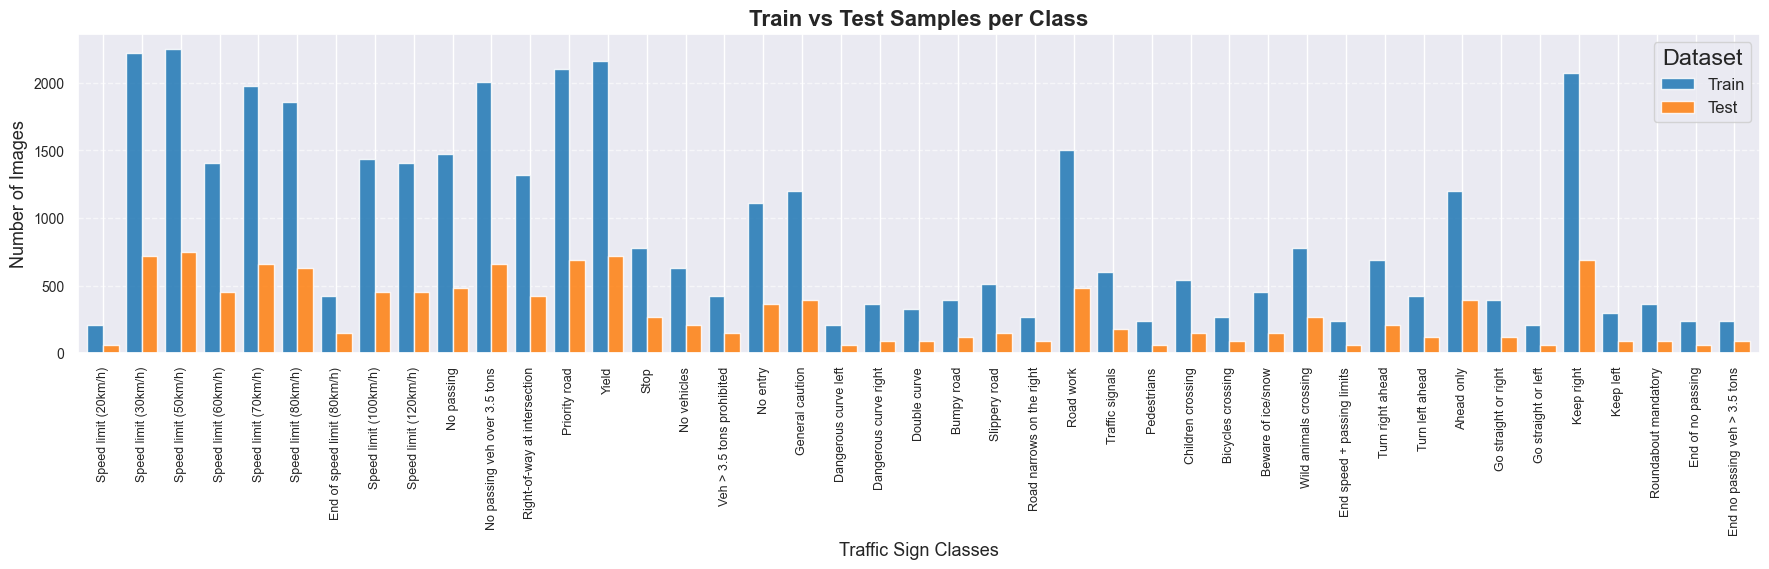

In [6]:
# Visualize class distribution in training and testing datasets
# Count samples per class
# Get unique class IDs and their counts
train_ids, train_counts = np.unique(train_labels, return_counts=True)
test_ids, test_counts = np.unique(test_labels, return_counts=True)

df = pd.DataFrame({
    'Train': pd.Series(train_counts, index=train_ids),
    'Test': pd.Series(test_counts, index=test_ids)
})

# Add class names
df.index = [classes[i] for i in df.index]

# Plot
# Bar plot for class distribution
# Set figure size and plot parameters
ax = df.plot.bar(figsize=(18,6), width=0.8, alpha=0.85, color=["#1f77b4", "#ff7f0e"])

plt.title("Train vs Test Samples per Class", fontsize=16, fontweight="bold")
plt.ylabel("Number of Images", fontsize=13)
plt.xlabel("Traffic Sign Classes", fontsize=13)
plt.xticks(rotation=90, fontsize=9)   # Rotate x labels for readability
plt.yticks(fontsize=10)

plt.legend(title="Dataset", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [7]:
# Function to display a random image and its label
def display_random_image(classes, images, labels):
    """
        Display a random image from the images array and its corresponding label.
    """
    index = np.random.randint(images.shape[0])
    
    plt.figure(figsize=(3,3))
    plt.imshow(images[index])   
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Image #{index} : {classes[labels[index]]}', fontsize=12)
    plt.show()

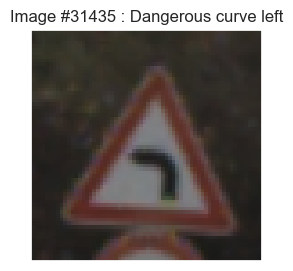

In [8]:
# Display a random training image and its label
display_random_image(classes, train_images, train_labels)

In [9]:
# Function to display multiple images with labels
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])  # RGB image, no cmap
        plt.xlabel(classes[labels[i]])
    plt.show()

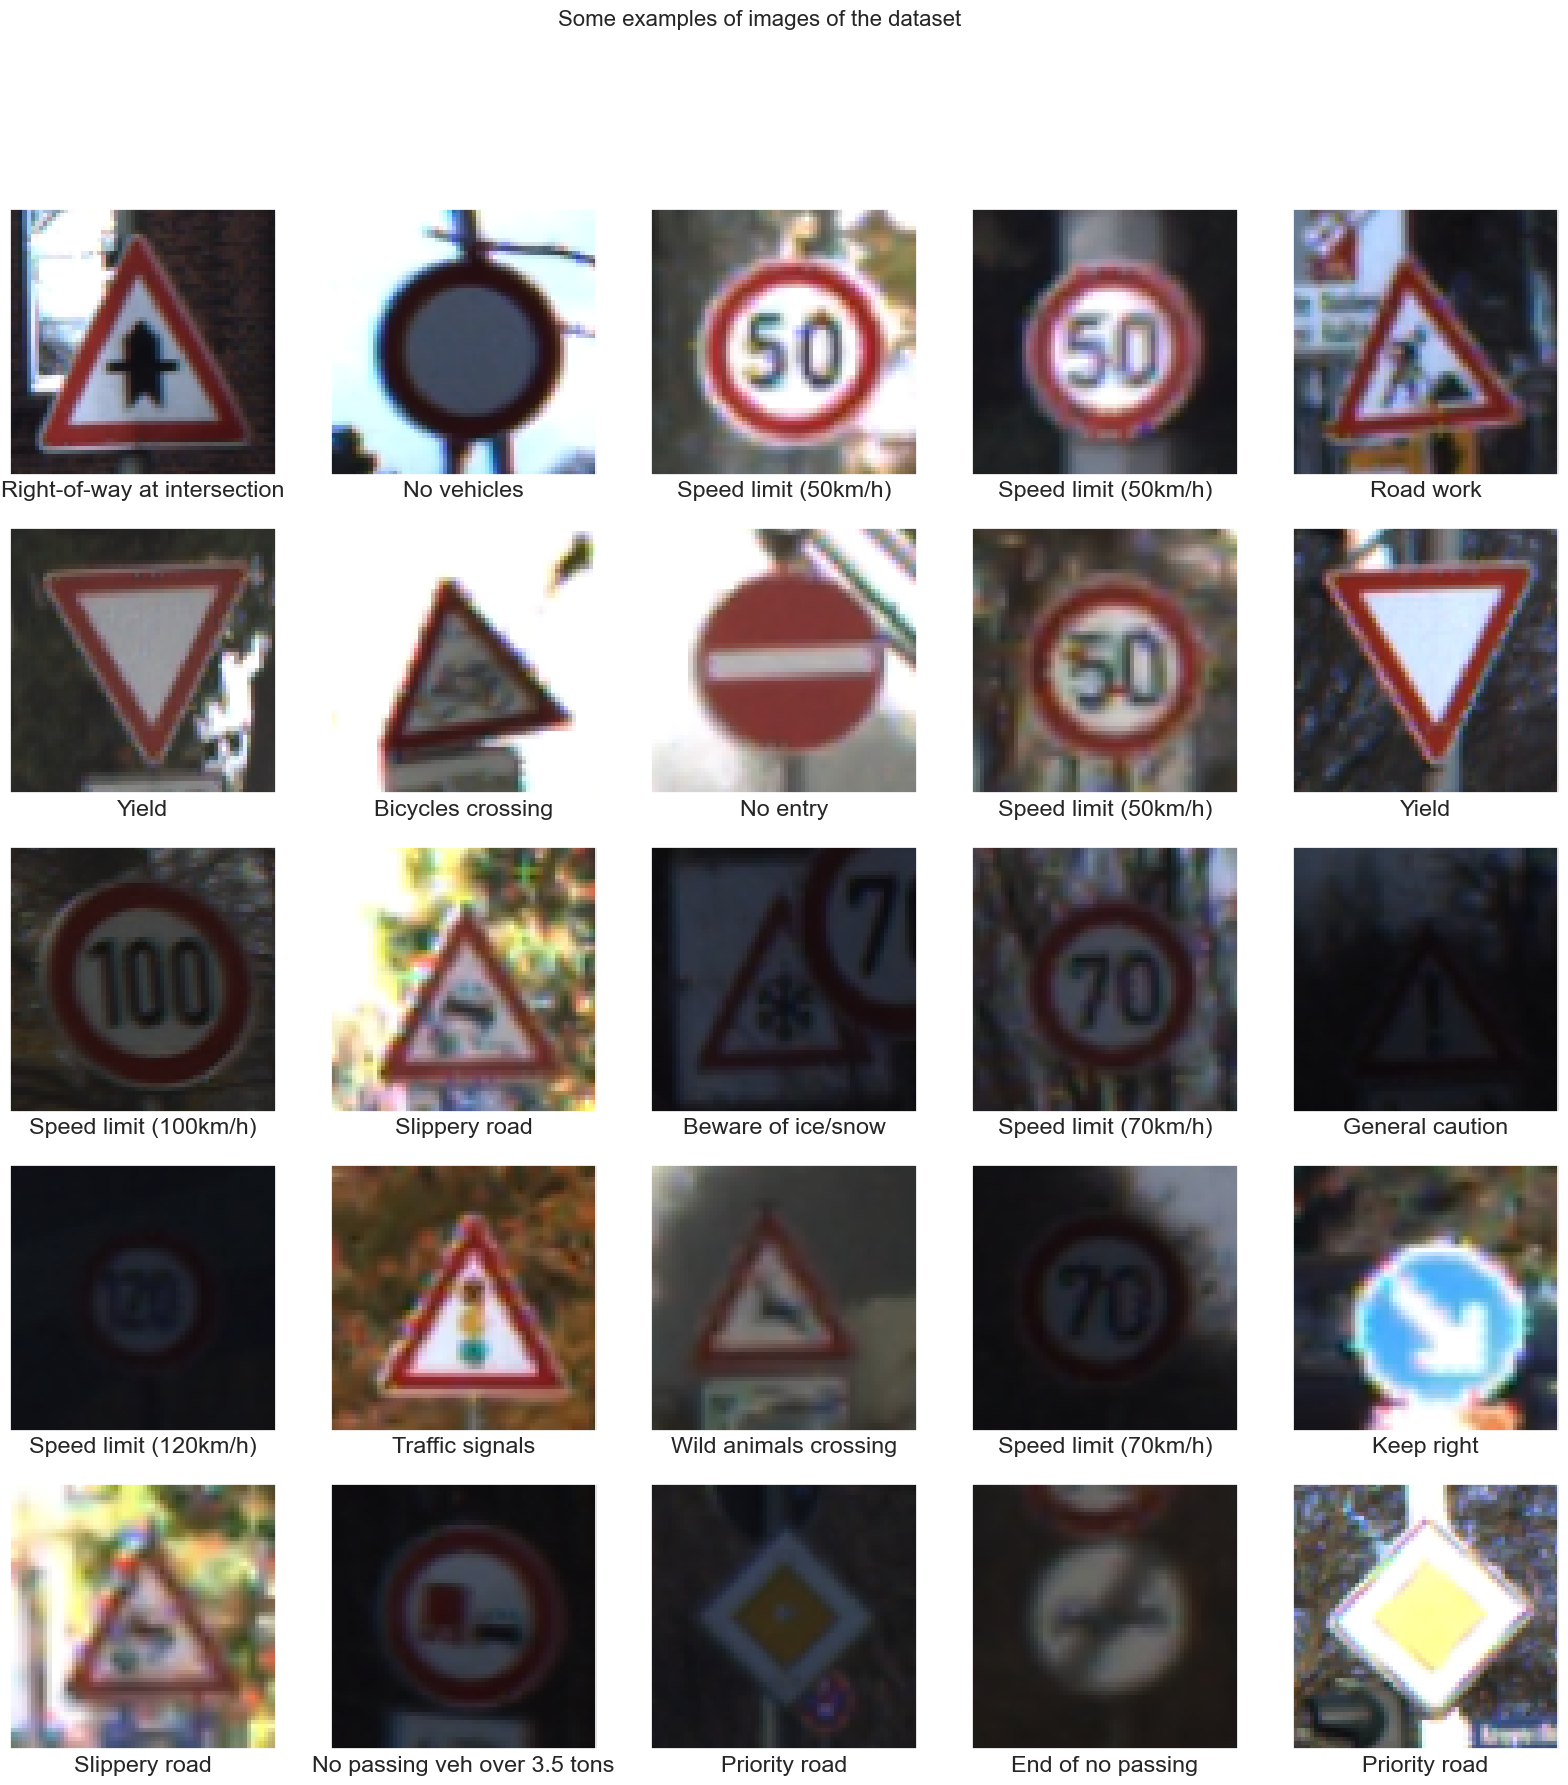

In [10]:
# Display multiple training images with labels
display_examples(classes, train_images, train_labels)

### 🧠 Modelo CNN

In [11]:
# Importing necessary libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=train_images.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model display
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,319,659 (73.70 MB)

 Trainable params: 19,319,659 (73.70 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 10
    history1 = model.fit(train_images, train_labels, batch_size=128, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step - accuracy: 0.7187 - loss: 0.9991 - val_accuracy: 0.9341 - val_loss: 0.2625
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.9780 - loss: 0.0765 - val_accuracy: 0.9580 - val_loss: 0.2021
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.9903 - loss: 0.0344 - val_accuracy: 0.9603 - val_loss: 0.2222
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.9930 - loss: 0.0225 - val_accuracy: 0.9584 - val_loss: 0.2342
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 519s 2s/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9697 - val_loss: 0.1527
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 525s 2s/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9639 - val_loss: 0.2094
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9695 - val_loss: 0.1975
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.9944 - loss: 0.0188 - val_accu

### 📈 Gráfico de la Presición (Accuracy)

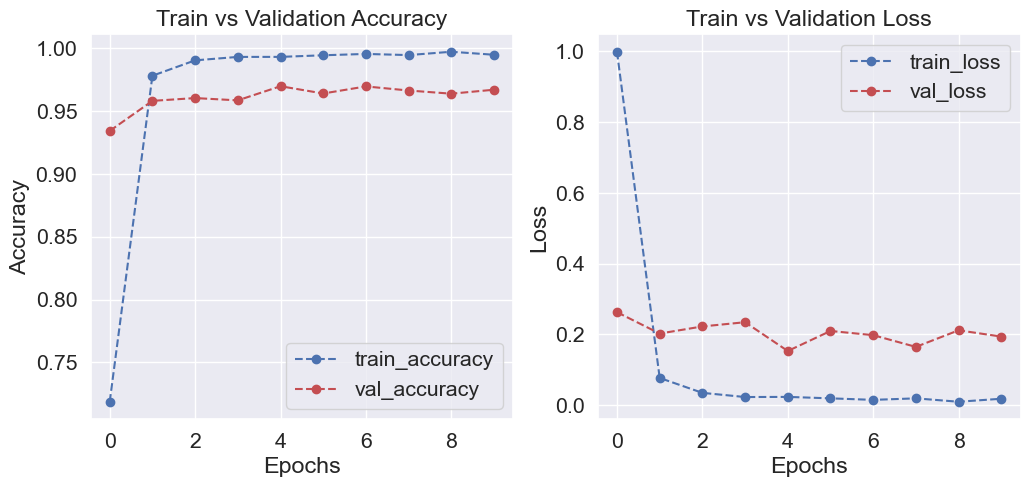

In [13]:
# Plotting accuracy and loss
def plot_accuracy_loss(history):
    """
    Plot the accuracy and the loss during the training of the nn.
    """
    # Create subplots
    fig = plt.figure(figsize=(12,5))

    # Plot accuracy
    plt.subplot(1,2,1)
    plt.plot(history1.history['accuracy'], 'bo--', label='train_accuracy')
    plt.plot(history1.history['val_accuracy'], 'ro--', label='val_accuracy')
    plt.title("Train vs Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(1,2,2)
    plt.plot(history1.history['loss'], 'bo--', label='train_loss')
    plt.plot(history1.history['val_loss'], 'ro--', label='val_loss')
    plt.title("Train vs Validation Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.show()

# Call the function to plot accuracy and loss
plot_accuracy_loss(history1)

### 🔮 Predicciones

In [14]:
# Making Predictions and Evaluating the Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions
pred_probs = model.predict(test_images)         
pred_labels = np.argmax(pred_probs, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step


### 📋 Informe de Clasificación

In [15]:
# Classification Report
classes = [str(i) for i in range(43)]

print("Classification Report:")
print(classification_report(test_labels, pred_labels, target_names=classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        60
           1       0.95      0.98      0.97       720
           2       0.98      0.99      0.99       750
           3       0.91      0.99      0.95       450
           4       0.98      0.98      0.98       660
           5       0.97      0.92      0.95       630
           6       1.00      0.80      0.89       150
           7       0.97      0.95      0.96       450
           8       0.95      0.98      0.96       450
           9       0.97      1.00      0.98       480
          10       1.00      0.99      1.00       660
          11       0.97      0.98      0.97       420
          12       0.99      0.98      0.98       690
          13       0.99      0.99      0.99       720
          14       1.00      0.99      0.99       270
          15       0.95      1.00      0.97       210
          16       1.00      0.97      0.98       150
    

### 🔢 Matriz de Confusión (CM)

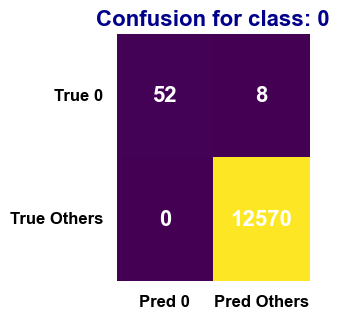

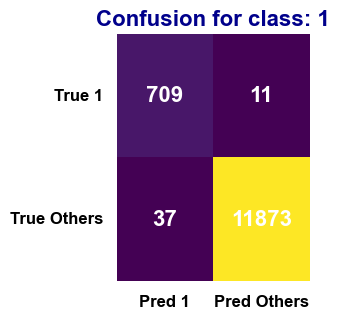

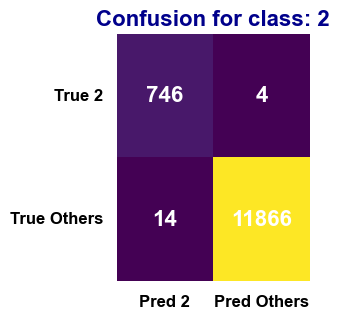

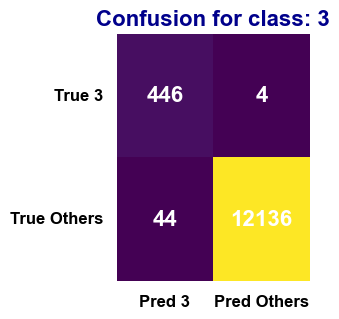

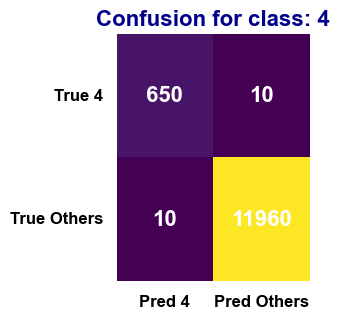

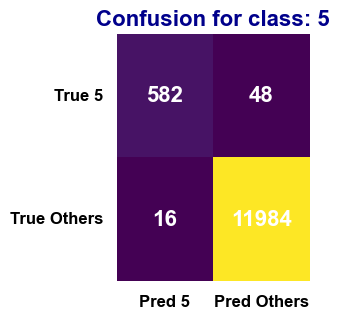

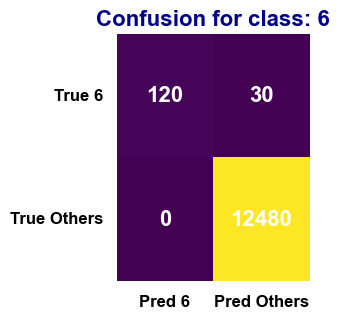

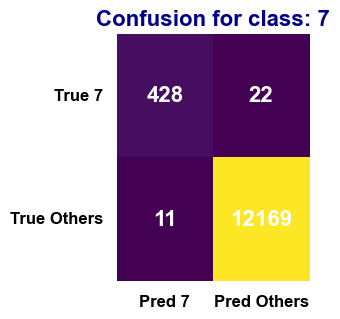

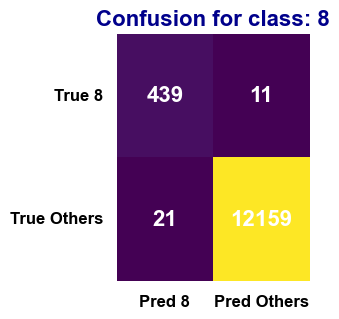

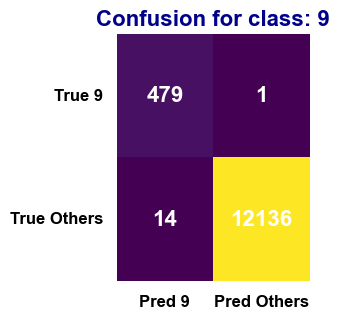

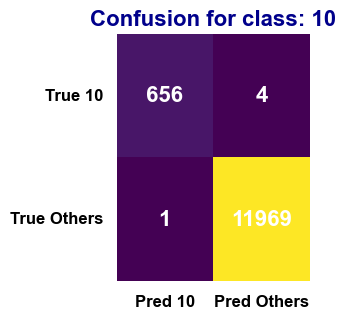

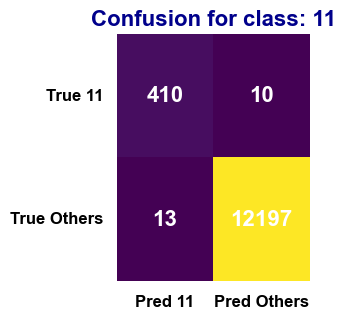

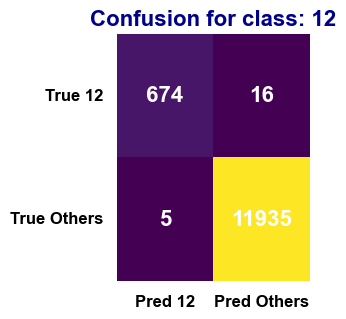

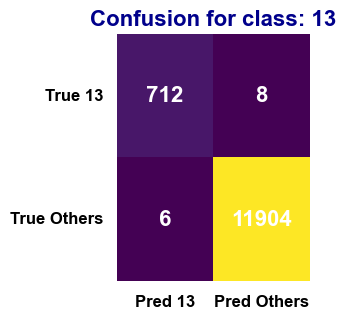

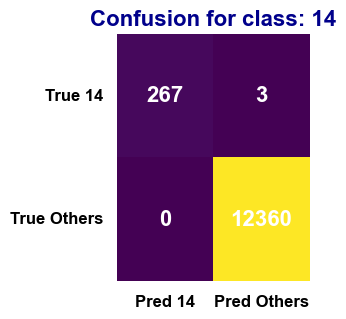

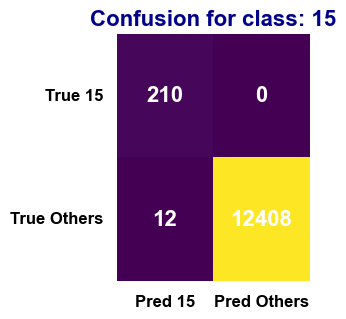

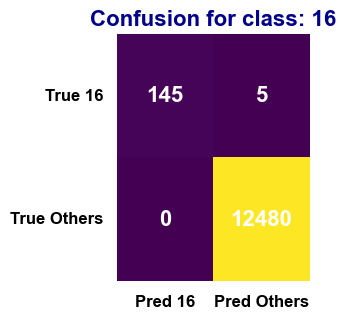

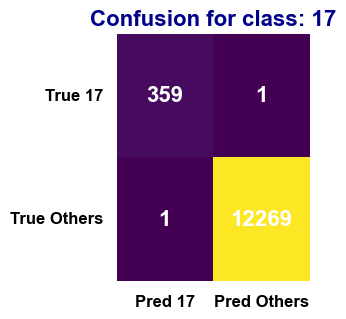

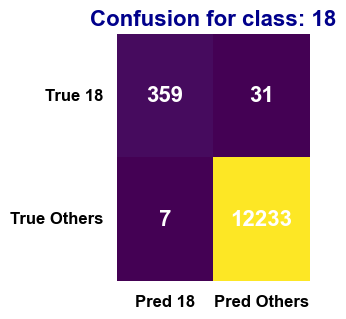

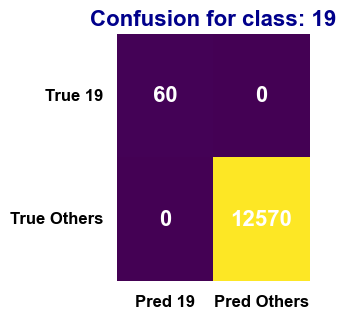

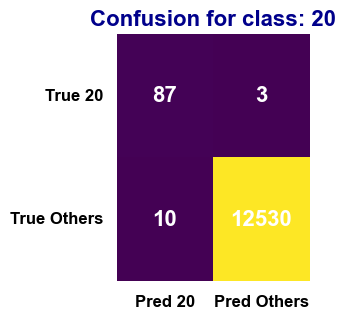

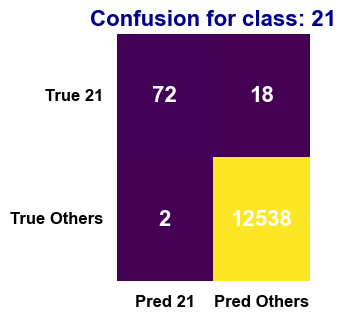

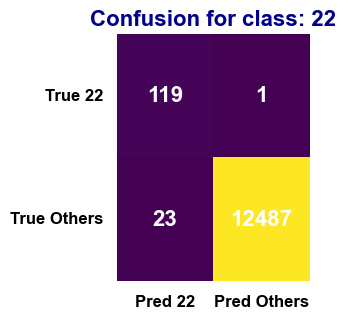

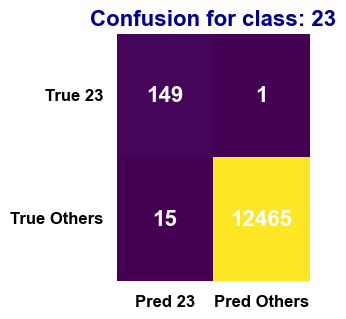

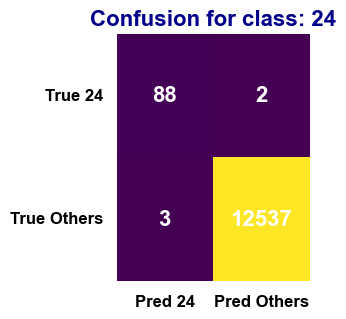

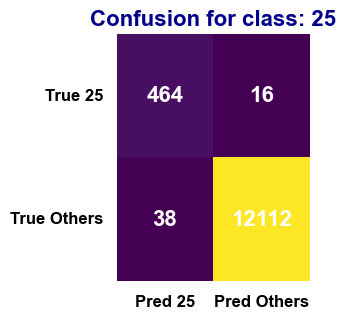

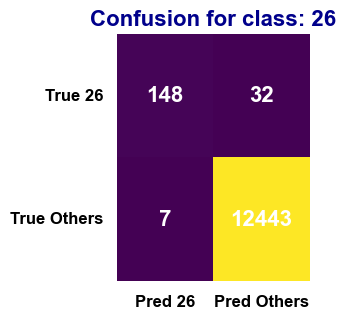

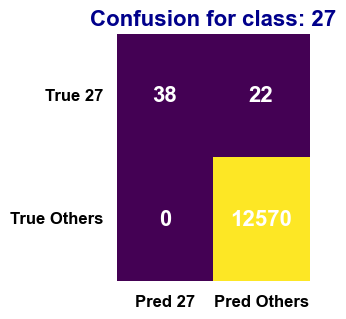

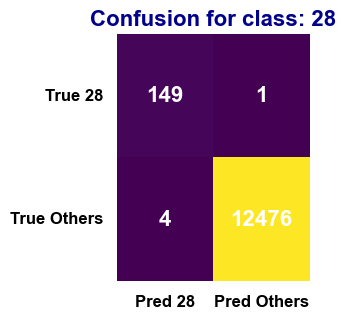

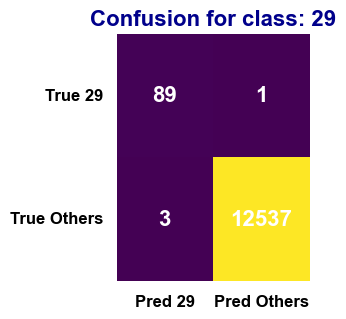

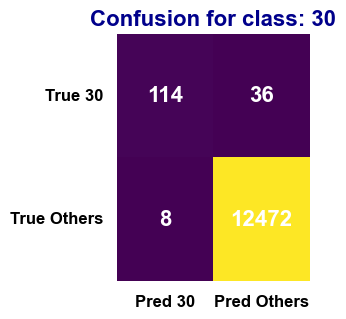

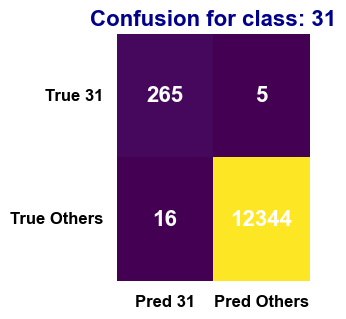

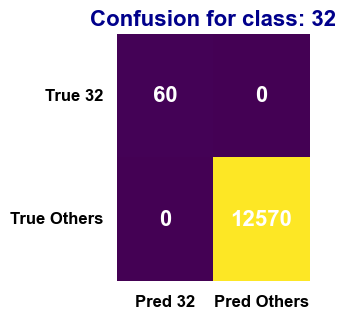

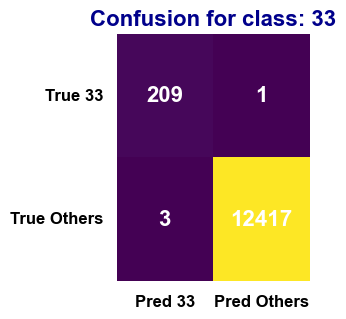

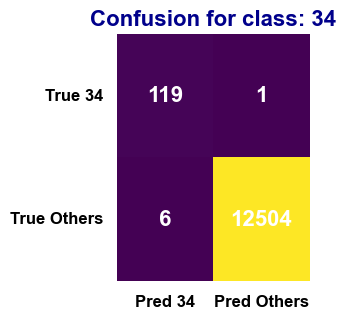

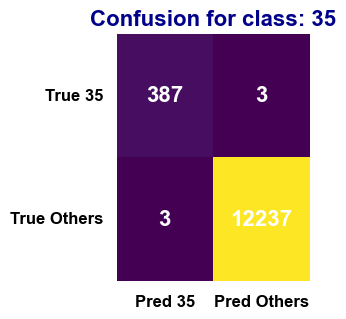

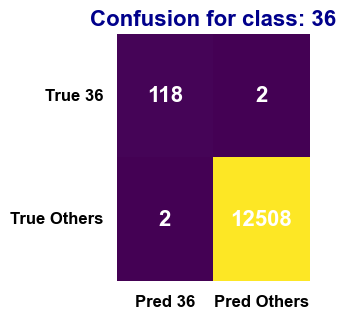

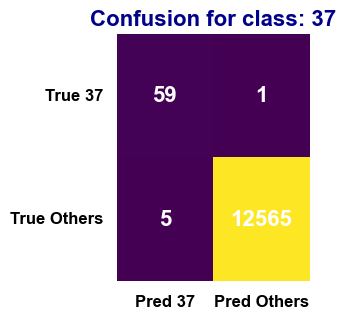

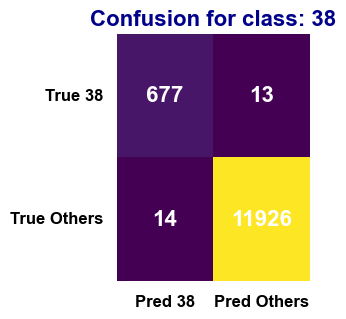

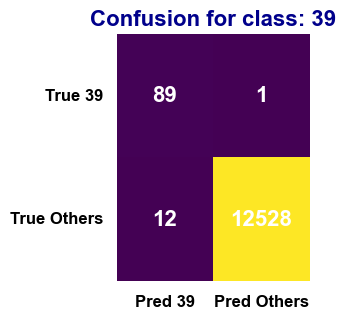

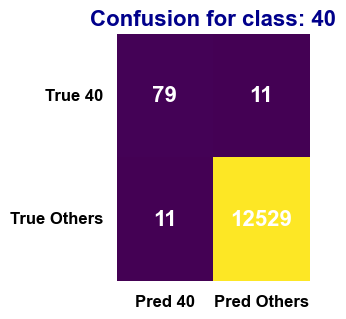

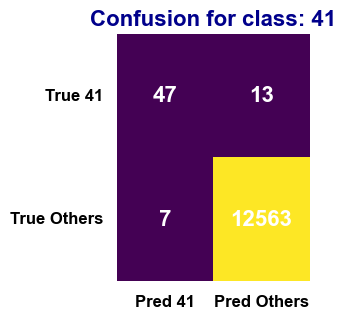

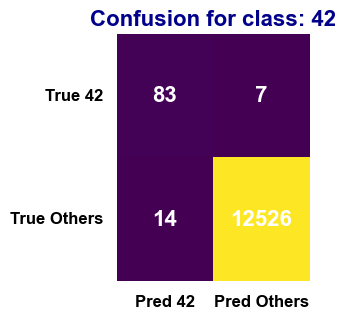

In [16]:
# Importing necessary library
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Plot confusion matrix for each class
for i, cls in enumerate(classes):
    plt.figure(figsize=(3.5,3.5))
    
    # Building 2x2 matrix for the class
    cm_class = [[cm[i,i], cm[i].sum() - cm[i,i]],
                [cm[:,i].sum() - cm[i,i], cm.sum() - cm[i].sum() - cm[:,i].sum() + cm[i,i]]] 
    
    # Plot heatmap
    ax = sns.heatmap(cm_class, annot=True, fmt="d", cmap="viridis", cbar=False,
                     xticklabels=[f"Pred {cls}", "Pred Others"],
                     yticklabels=[f"True {cls}", "True Others"],
                     annot_kws={"size":16, "weight":"bold", "color":"white"})   
    
    plt.title(f"Confusion for class: {cls}", fontsize=16, weight="bold", color="darkblue")
    plt.xticks(fontsize=12, weight="bold", color="black")
    plt.yticks(fontsize=12, weight="bold", color="black", rotation=0)
    plt.tight_layout()
    plt.show()

### 📊 Análisis de Métricas
#### 🚀 Rendimiento General (Promedios)
* **Accuracy (0.97):** La precisión global es del 97%. Esto es un resultado excelente, indicando que el 97% de todas las predicciones hechas por el modelo en el conjunto de prueba fueron correctas.

* **Macro Avg (0.95 en F1-score):** El promedio simple de las métricas F1 de todas las clases es 0.95. Esto sugiere que el modelo se desempeña de manera consistente en casi todas las clases, sin ser sesgado por las clases con más muestras.

* **Weighted Avg (0.97 en F1-score):** El promedio ponderado (por el número de muestras/support) es 0.97. Esto confirma que el rendimiento general del modelo es robusto, especialmente en las clases más representadas.

### 🎯 Fortalezas Específicas del Modelo
* **Clasificación Perfecta (F1-score = 1.00):** Las Clases 17 y 19 tienen un F1-score de 1.00. Esto significa que el modelo clasificó estas clases sin un solo error (tanto en precisión como en exhaustividad). Totalmente explicitado en las CMs de para ambas clases. 

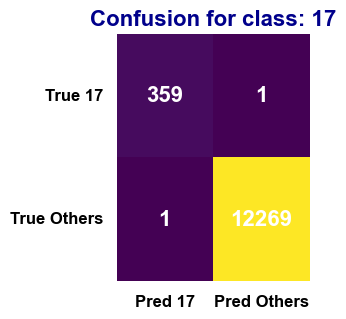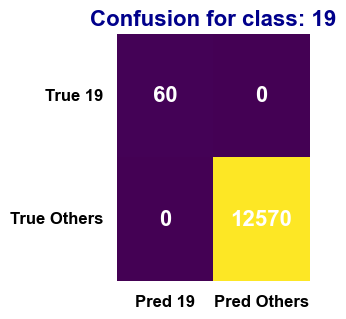 

* **Rendimiento Sólido en Clases Grandes:** Las clases con alto support (ej. Clase 1, 2, 4, 10, 12, 13) tienen F1-scores consistentemente por encima de 0.97, lo que demuestra que el modelo aprende muy bien de los datos abundantes. Comportamiento visualizable en las CMs de las clases tomadas como ejemplo.

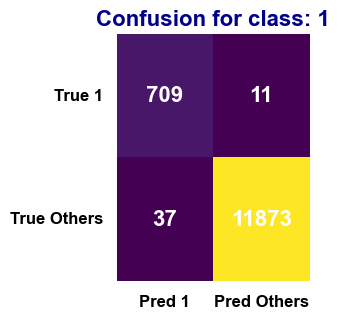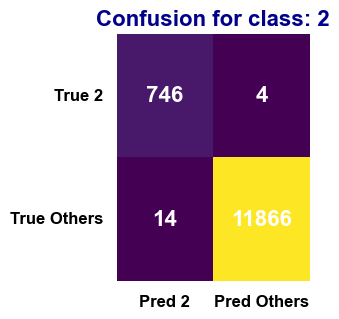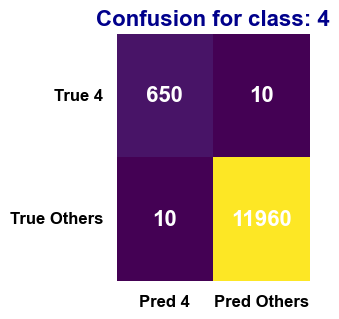
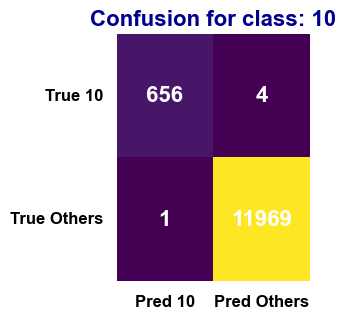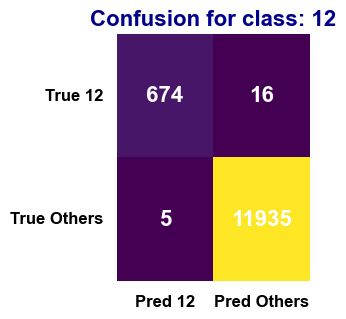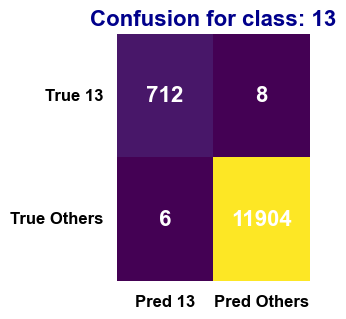

### 🤔 Debilidades y Áreas de Mejora
**Cases con Menor Recall:**

* **Clase 6 (Recall: 0.80, F1-score: 0.89, Support: 150):** Esta clase tiene un Recall bajo, lo que significa que el modelo omitió (no identificó) al 20% de las señales que realmente pertenecían a esta clase, confundiéndolas con otras. La CM para la clase en cuestión clasifico erróneamente 30 señales (Falsos Positivos). 

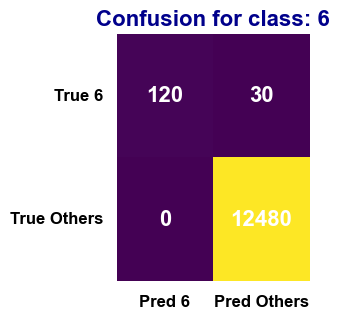

* **Clase 21 (Recall: 0.80, F1-score: 0.88, Support: 90):** Similar a la Clase 6, el 20% de estas señales fueron erróneamente clasificadas como otra cosa, totalmente visible en su CM. 

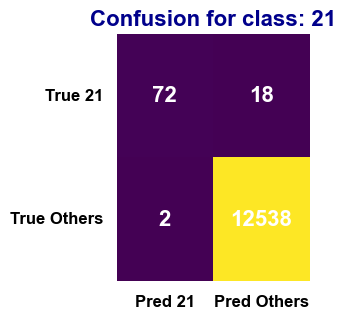

* **Clase 0 (Recall: 0.87, F1-score: 0.93, Support: 60):** A pesar de tener una Precisión perfecta (1.00), su Recall es más bajo. Esto implica que, aunque cuando predice Clase 0 casi siempre acierta, dejó de identificar al 13% de las señales Clase 0 reales, explicitado en su CM.

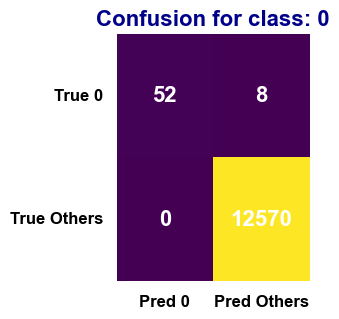

*Estas clases con **Menor Recall** (especialmente Clase 6 y 21) suelen ser aquellas donde las señales son visualmente similares a otras clases o donde el modelo no tuvo suficientes muestras para aprender sus características distintivas, ya que tienen un support relativamente bajo.*

### 💡 Conclusiones
* **Alto Rendimiento en Clasificación:** El modelo CNN demostró una precisión (Accuracy) del 97% en el conjunto de prueba, lo que indica un rendimiento excepcionalmente bueno para una tarea de clasificación multi-clase en imágenes con alta variabilidad.

* **Eficacia de la Arquitectura CNN:** La arquitectura utilizada (capas convolucionales, Pooling y Dropout) resultó ser muy efectiva para extraer las características relevantes y clasificar las 43 clases de señales de tráfico presentes en el dataset GTSRB.

* **Importancia del Preprocesamiento y Aumento de Datos:** La aplicación de técnicas de preprocesamiento (como el redimensionamiento a 64x64 píxeles y la normalización) y el aumento de datos (rotación, desplazamiento, cizallamiento y zoom) fue crucial para mejorar la robustez del modelo y su capacidad de generalización ante variaciones en las imágenes de entrada.

* **Gestión de la Complejidad del Dataset:** El modelo logró generalizar eficazmente a pesar de la alta cantidad de clases (43) y la desigual distribución de muestras entre ellas (desbalance de clases), una característica común en este tipo de desafíos.

* **Identificación de Áreas de Mejora:** El análisis detallado de la matriz de confusión (que el notebook genera, aunque no se ve completamente el output en texto) y el reporte de clasificación son herramientas clave para identificar las clases específicas donde el modelo podría tener dificultades, a menudo aquellas con un número reducido de ejemplos.

*El modelo CNN ha logrado un rendimiento excepcional con una precisión general del 97%, siendo muy robusto en la mayoría de las clases, pero presenta desafíos específicos en la identificación completa (Recall) de algunas clases minoritarias.*